# **LungCancerDetection_VariousMLAlgorithm**

### *Importing Libraries*

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot

### *Choose Dataset from Local Directory*

### *Load Dataset*

In [2]:
dataset = pd.read_csv('lung_cancer.csv')

### *Summarize Dataset*

In [3]:
print(dataset.shape)
print(dataset.head(5))

(309, 16)
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2            

### *Mapping Class String Values to Numbers*

In [4]:
dataset['LUNG_CANCER'] = dataset['LUNG_CANCER'].map({'YES': 0, 'NO': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1      

### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [5]:
X = dataset.iloc[:, 2:15].values
X

array([[1, 2, 2, ..., 2, 2, 2],
       [2, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 1, 2],
       ...,
       [2, 1, 1, ..., 1, 1, 2],
       [2, 1, 2, ..., 2, 1, 2],
       [1, 1, 1, ..., 1, 2, 1]], dtype=int64)

In [6]:
Y = dataset.iloc[:,-1].values
Y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### *Splitting Dataset into Train & Test*

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### *Feature Scaling*
### we scale our data to make all the features contribute equally to the result
###Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
###Transform - Transform method is transforming all the features using the respective mean and variance, 
###We want our test data to be a completely new and a surprise set for our model

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

### *Validating some ML algorithm by its accuracy - Model Score*

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [10]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.922101
LDA: 0.917572
KNN: 0.887681
CART: 0.913587
NB: 0.909058
SVM: 0.904891


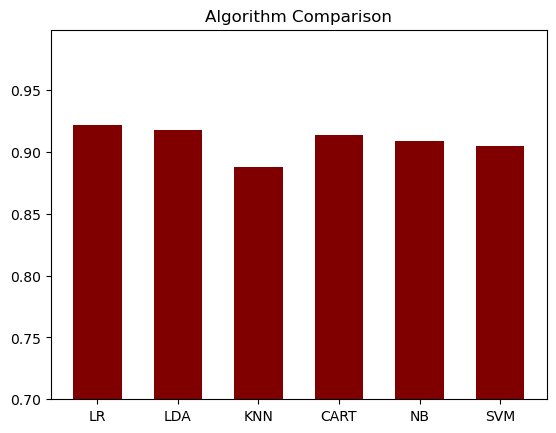

In [11]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

pyplot.ylim(.700, .999)
pyplot.bar(names, res, color ='maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()

### *Training & Prediction using the algorithm with high accuracy*

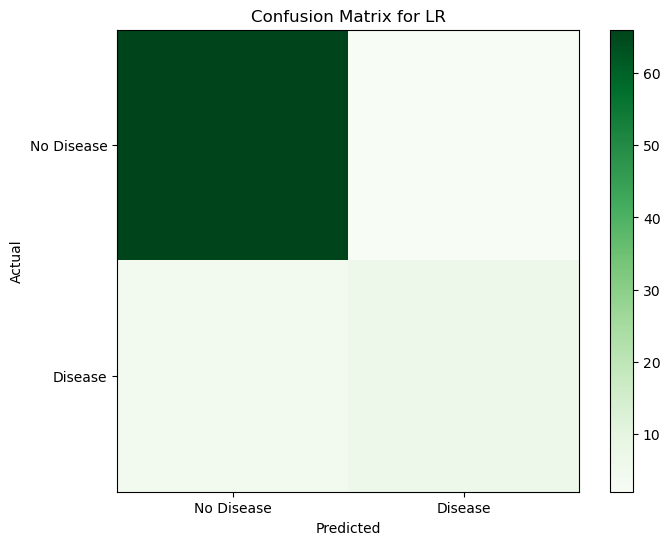

Confusion matrix for LR:
[[66  2]
 [ 4  6]]



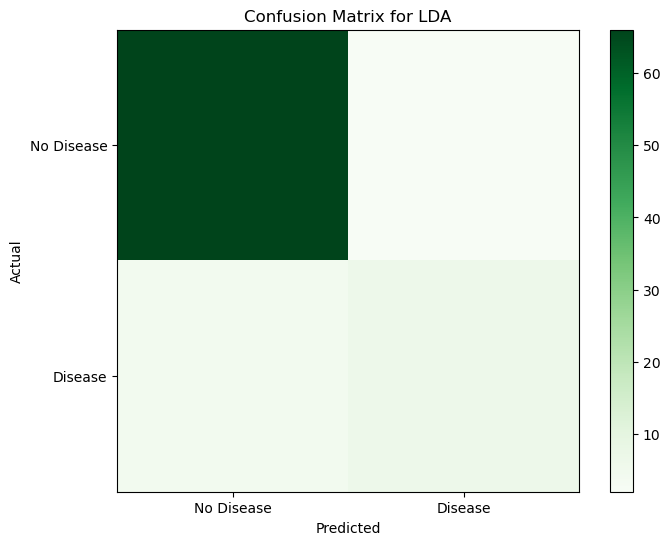

Confusion matrix for LDA:
[[66  2]
 [ 4  6]]



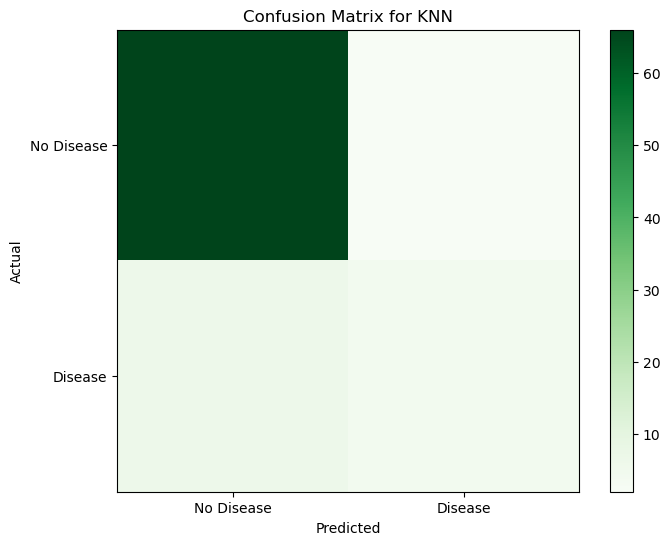

Confusion matrix for KNN:
[[66  2]
 [ 6  4]]



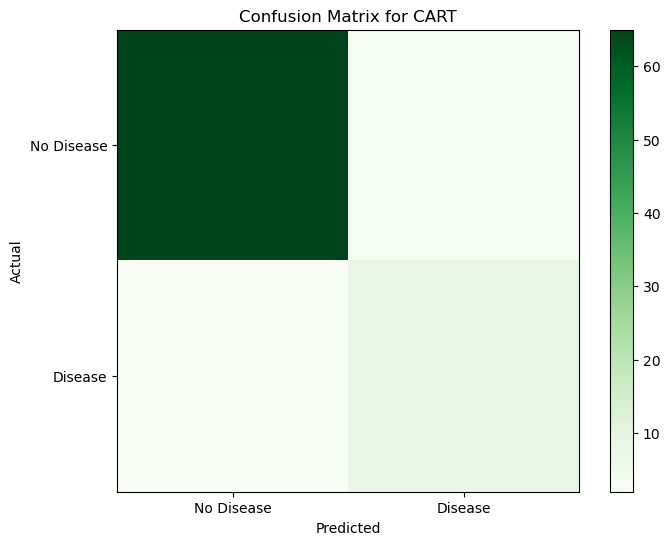

Confusion matrix for CART:
[[65  3]
 [ 2  8]]



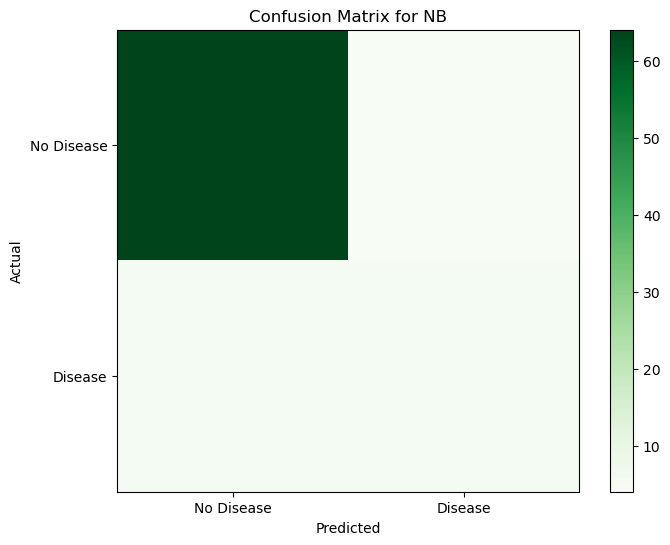

Confusion matrix for NB:
[[64  4]
 [ 5  5]]



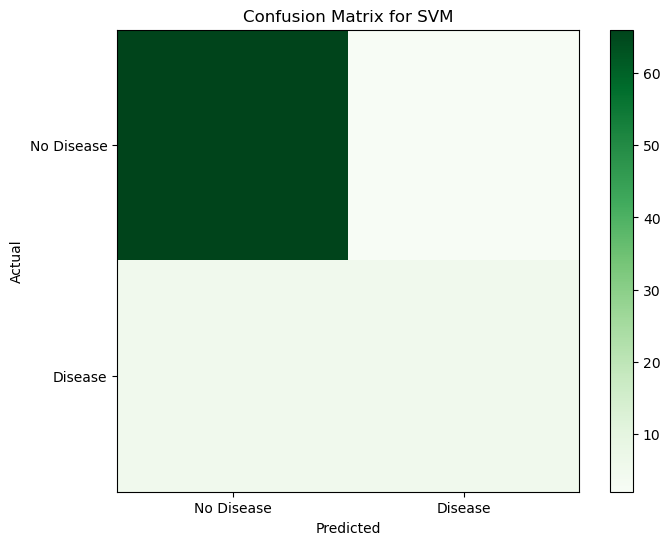

Confusion matrix for SVM:
[[66  2]
 [ 5  5]]



In [12]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title(f'Confusion Matrix for {name}')
    plt.colorbar()
    tick_marks = np.arange(2)  # Assuming target values are binary (0 or 1)
    plt.xticks(tick_marks, ['No Disease', 'Disease'])
    plt.yticks(tick_marks, ['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f'Confusion matrix for {name}:')
    print(cm)
    print()

LR: 0.922101
LDA: 0.917572
KNN: 0.887681
CART: 0.913587
NB: 0.909058
SVM: 0.904891


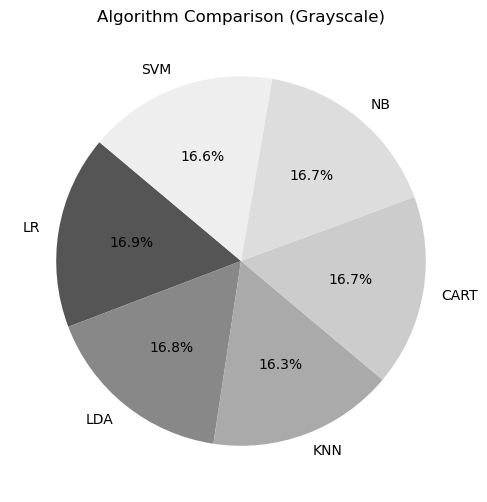

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
names = []
res = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

grayscale_colors = ['#555555', '#888888', '#aaaaaa', '#cccccc', '#dddddd', '#eeeeee']

pyplot.figure(figsize=(8, 6))
pyplot.pie(res, labels=names, colors=grayscale_colors, autopct='%1.1f%%', startangle=140)
pyplot.title('Algorithm Comparison (Grayscale)')
pyplot.show()

LR AUC: 0.922101
LDA AUC: 0.917572
KNN AUC: 0.887681
CART AUC: 0.913587
NB AUC: 0.909058
SVM AUC: 0.904891


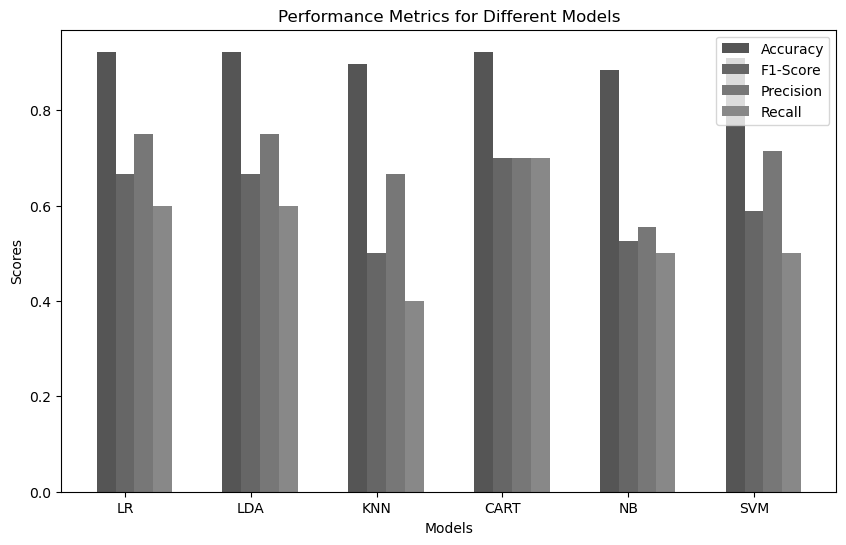

In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


names = []
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

accuracy_color = '#555555'
f1_color = '#666666'
precision_color = '#777777'
recall_color = '#888888'

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold)

    names.append(name)
    print('%s AUC: %f' % (name, cv_results.mean()))

    # Fit the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)



bar_width = 0.15
index = np.arange(len(names))
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width, accuracy_scores, bar_width, label='Accuracy', color=accuracy_color)
bar2 = ax.bar(index, f1_scores, bar_width, label='F1-Score', color=f1_color)
bar3 = ax.bar(index + bar_width, precision_scores, bar_width, label='Precision', color=precision_color)
bar4 = ax.bar(index + 2*bar_width, recall_scores, bar_width, label='Recall', color=recall_color)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(names)
ax.legend()

plt.show()

In [15]:
metrics_df = pd.DataFrame({
    'Model': names,
    'Accuracy': accuracy_scores,
    'F1-Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
})

# Display the table
print(metrics_df)

  Model  Accuracy  F1-Score  Precision  Recall
0    LR  0.923077  0.666667   0.750000     0.6
1   LDA  0.923077  0.666667   0.750000     0.6
2   KNN  0.897436  0.500000   0.666667     0.4
3  CART  0.923077  0.700000   0.700000     0.7
4    NB  0.884615  0.526316   0.555556     0.5
5   SVM  0.910256  0.588235   0.714286     0.5
